# 1. Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
store_df = pd.read_csv('data/store.csv')
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

/var/folders/61/rqxnvzd54cn2vyyxhg42gs5r0000gn/T/ipykernel_36176/328647047.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('data/train.csv')


In [3]:
train_df.shape

(1017209, 9)

# 2 Data reviewing

## 2-2 EDA

In [4]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [5]:
train_df[['Sales', 'Customers']].describe()

,Sales,Customers
count,1.017209e+06,1.017209e+06
mean,5.773819e+03,6.331459e+02
std,3.849926e+03,4.644117e+02
min,0.000000e+00,0.000000e+00
25%,3.727000e+03,4.050000e+02
50%,5.744000e+03,6.090000e+02
75%,7.856000e+03,8.370000e+02
max,4.155100e+04,7.388000e+03


In [6]:
store_df[['CompetitionDistance']].describe()

,CompetitionDistance
count,1112.000000
mean,5404.901079
std,7663.174720
min,20.000000
25%,717.500000
50%,2325.000000
75%,6882.500000
max,75860.000000


In [7]:
# test_df.describe()
# useless because there is no numerical data

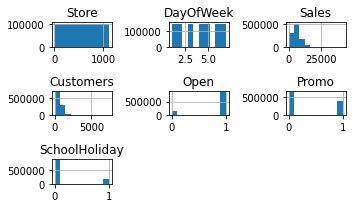

In [8]:
#histogram
train_df.hist(bins=10, figsize=(5,3))
plt.tight_layout()
plt.show()


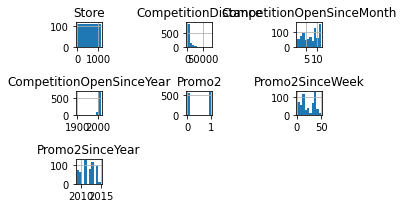

In [9]:
#histogram
store_df.hist(bins=10, figsize=(5,3))
plt.tight_layout()
plt.show()


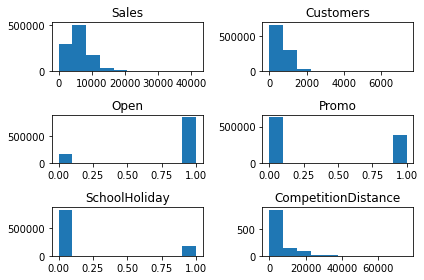

In [10]:
# create the panel with 2 rows and 2 columns
fig, axs = plt.subplots(3, 2)

# plot histograms in first subplot
axs[0, 0].hist(train_df["Sales"])
axs[0, 0].set_title("Sales")

# plot histograms in the second subplot
axs[0, 1].hist(train_df["Customers"])
axs[0, 1].set_title("Customers")

# plot histograms in the second subplot
axs[1, 0].hist(train_df["Open"])
axs[1, 0].set_title("Open")

# plot histograms in the second subplot
axs[1, 1].hist(train_df["Promo"])
axs[1, 1].set_title("Promo")

# plot histograms in the second subplot
axs[2, 0].hist(train_df["SchoolHoliday"])
axs[2, 0].set_title("SchoolHoliday")

# plot histograms in the third subplot
axs[2, 1].hist(store_df["CompetitionDistance"])
axs[2, 1].set_title("CompetitionDistance")

# adjust the layout
fig.tight_layout()

# show the plot
plt.show()


## Correlation

## 2-2. Data Quality

## store_df

In [11]:
store_df.shape

(1115, 10)

In [12]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [13]:
# Completeness
# = checking missing values
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [14]:
# num rows with missing values
store_df.isna().any(axis=1).sum()

750

In [15]:
# Accuracy
# Check the number of categories of categorical values
store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

Can see all categorical values have accurate values

- Are values in Year consistent with the data range?
- Are monthds in PromoInterval really in each three months?

In [16]:
# Investigate missing values
print(min(store_df['CompetitionDistance']))
print(max(store_df['CompetitionDistance']))
store_df[store_df['CompetitionDistance'].isna()]

20.0
75860.0


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


These three stores do not have competition

In [17]:
store_df[store_df['CompetitionOpenSinceMonth'].isna()][:5]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"


There are cases that a store has competition but you cannot tell when it opened.

In [18]:
promo2week_na_df = store_df[store_df['Promo2SinceWeek'].isnull()]
print(promo2week_na_df.isna().sum())

for i in promo2week_na_df['Promo2']:
    if i != 0:
        print('This store is participating in Promo2')

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            2
CompetitionOpenSinceMonth    148
CompetitionOpenSinceYear     148
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


'promo2week_na_df' is a dataframe which contains only rows with NaN in Promo2SinceWeek.
The number of NaN of Year and Interval are still 544, so all rows overlap.
In addition, there is no store participating in Promo2 in these stores. Thus, it is possible to say that these stores do not have information about when they started Promo2 because they are still not participating it yet.

## train_df

In [19]:
train_df.shape

(1017209, 9)

In [20]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1


In [21]:
train_df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [22]:
# Completeness
# missing values
train_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Since there is no missing values, it seems complete data

In [23]:
train_df.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [24]:
pd.unique(train_df.loc[:,'StateHoliday'])

array(['0', 'a', 'b', 'c', 0], dtype=object)

StateHoliday should have 4 categories, but there are 5. There are int 0 and str 0. Thus this column has inconsistency.

In [25]:
# Expensive
# sns.scatterplot(data=train_df, x='Customers', y='Sales', hue='Open')

Sales and Customers are always 0 if Open = 0, so accurate

In [26]:
# Expensive
# sns.displot(train_df, x="Sales", hue="StateHoliday", multiple="stack")

Sales are o when StateHoliday is a, b, c (?)

In [27]:
# not sure if works
# sns.catplot(data=train_df, x="StateHoliday", y="Sales", hue="Open",kind="violin", inner="stick", split=True, palette="pastel",)

In [28]:
# not sure if it works 
# sns.catplot(train_df, x="SchoolHoliday", y ="Sales" hue="Open", kind="violin", inner="stick", split=True, palette="pastel",)

## test_df

In [29]:
test_df.shape

(41088, 9)

In [30]:
test_df.isna().sum()

Store                0
DayOfWeek            0
Date                 0
Sales            41088
Customers        41088
Open                11
Promo                0
StateHoliday         0
SchoolHoliday        0
dtype: int64

In [31]:
test_df.nunique()

Store            856
DayOfWeek          7
Date              48
Sales              0
Customers          0
Open               2
Promo              2
StateHoliday       2
SchoolHoliday      2
dtype: int64

# Pre-processing

## 3-1 Missing Values

### Store_df, CompetitionDistance

In [32]:
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [33]:
store_df_2 = store_df.fillna({'CompetitionDistance': 1000000})
store_df_2.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### Store_df, CompetitionOpenSinceMonth/Year

Suppose all competitions with no information about open date had already opened before the data-starting date. Since the train data starts from January 1st in 2013, as a random date before that, January 1st in 2012 would be used in this analysis.

In [34]:
store_df_2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [35]:
store_df_3 = store_df_2.fillna({'CompetitionOpenSinceMonth': 1, 'CompetitionOpenSinceYear': 2012})
store_df_3.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### Store_df, Promo2SinceWeek/Year/Interval

Since all stores with missing values in Promo2SinceWeek or Year is not participating in Promo2, inpute a random future date in these missing values. The 1st week in 2030 is used in this analysis.

In [36]:
store_df_3.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [37]:
store_df_4 = store_df_3.fillna({'Promo2SinceWeek': 1, 'Promo2SinceYear': 2030, 'PromoInterval': 'Jan,Apr,Jul,Oct'})
print(store_df_4.isna().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


## 3-2 Making New Variables

### Year/month dummies

In [38]:
# Year/Month dammies
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1


In [39]:
import datetime

str = train_df.loc[0]['Date']
dte = datetime.datetime.strptime(str, '%d/%m/%Y')
print(dte)

2015-07-31 00:00:00


In [40]:
# Expensive (2m 47s)
'''
year_list = []
month_list =[]
year_month_list =[]
for i in range(1017209):
    str = train_df.loc[i]['Date']
    dte = datetime.datetime.strptime(str, '%d/%m/%Y')
    year_month_list.append(dte)
    year_list.append(dte.year)
    month_list.append(dte.month)
'''

"\nyear_list = []\nmonth_list =[]\nyear_month_list =[]\nfor i in range(1017209):\n    str = train_df.loc[i]['Date']\n    dte = datetime.datetime.strptime(str, '%d/%m/%Y')\n    year_month_list.append(dte)\n    year_list.append(dte.year)\n    month_list.append(dte.month)\n"

In [41]:
'''
print(len(year_list))
print(len(month_list))
print(len(year_month_list))
'''

'\nprint(len(year_list))\nprint(len(month_list))\nprint(len(year_month_list))\n'

In [42]:
'''
year_month_data = {'year': year_list, 'month': month_list, 'year_month': year_month_list}
year_month_df = pd.DataFrame(year_month_data)
year_month_df.to_csv('year_month_df.csv', index=True)

train_df2 = train_df.copy()
train_df2['year'] = pd.Series(year_list)
train_df2['month'] = pd.Series(month_list)
train_df2['year_month'] = pd.Series(year_month_list)
print(train_df2.head())
'''

"\nyear_month_data = {'year': year_list, 'month': month_list, 'year_month': year_month_list}\nyear_month_df = pd.DataFrame(year_month_data)\nyear_month_df.to_csv('year_month_df.csv', index=True)\n\ntrain_df2 = train_df.copy()\ntrain_df2['year'] = pd.Series(year_list)\ntrain_df2['month'] = pd.Series(month_list)\ntrain_df2['year_month'] = pd.Series(year_month_list)\nprint(train_df2.head())\n"

In [43]:
year_month_df = pd.read_csv('year_month_df.csv')
year_month_df.head()
train_df2 = train_df.copy()
train_df2['year'] = year_month_df[['year']]
train_df2['month'] = year_month_df[['month']]
train_df2['year_month'] = year_month_df[['year_month']]

In [44]:
train_df2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,year_month
1017204,1111,2,01/01/2013,0,0,0,0,a,1,2013,1,2013-01-01
1017205,1112,2,01/01/2013,0,0,0,0,a,1,2013,1,2013-01-01
1017206,1113,2,01/01/2013,0,0,0,0,a,1,2013,1,2013-01-01
1017207,1114,2,01/01/2013,0,0,0,0,a,1,2013,1,2013-01-01
1017208,1115,2,01/01/2013,0,0,0,0,a,1,2013,1,2013-01-01


In [45]:
train_df2.shape

(1017209, 12)

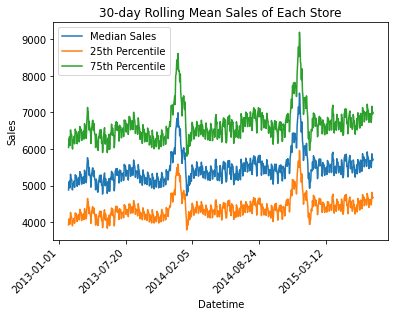

In [46]:
# Create a pivot table with Datetime as index, Store ID as columns and Sales as values
pivot_df = pd.pivot_table(train_df2, index='year_month', columns='Store', values='Sales')

# Compute the rolling mean for each store
rolling_mean = pivot_df.rolling(window=30).mean()

rolling_mean_median = rolling_mean.quantile(q=0.5, axis=1)
rolling_mean_25 = rolling_mean.quantile(q=0.25, axis=1)
rolling_mean_75 = rolling_mean.quantile(q=0.75, axis=1)

# Plot the rolling mean sales for each store
rolling_mean_median.plot()
rolling_mean_25.plot()
rolling_mean_75.plot()
plt.xlabel('Datetime')
plt.ylabel('Sales')
plt.legend(['Median Sales', '25th Percentile', '75th Percentile'])
plt.xticks(rotation=45, ha='right')
plt.title('30-day Rolling Mean Sales of Each Store')

plt.show()

In [47]:
# Get the one-hot encoding of the 'Store Category' column
year_one_hot_encoded = pd.get_dummies(train_df2['year'], prefix='year')

# Concatenate the one-hot encoding with the merged dataframe
train_df2 = pd.concat([train_df2, year_one_hot_encoded], axis=1)

# Get the one-hot encoding of the 'Store Category' column
month_one_hot_encoded = pd.get_dummies(train_df2['month'], prefix='month')

# Concatenate the one-hot encoding with the merged dataframe
train_df2 = pd.concat([train_df2, month_one_hot_encoded], axis=1)

# Drop redundant dummies
train_df2 = train_df2.drop(columns = ['year_2013', 'month_1'])

In [48]:
train_df2.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'year', 'month', 'year_month',
       'year_2014', 'year_2015', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12'],
      dtype='object')

In [49]:
train_df2.iloc[-5:]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
1017204,1111,2,01/01/2013,0,0,0,0,a,1,2013,...,0,0,0,0,0,0,0,0,0,0
1017205,1112,2,01/01/2013,0,0,0,0,a,1,2013,...,0,0,0,0,0,0,0,0,0,0
1017206,1113,2,01/01/2013,0,0,0,0,a,1,2013,...,0,0,0,0,0,0,0,0,0,0
1017207,1114,2,01/01/2013,0,0,0,0,a,1,2013,...,0,0,0,0,0,0,0,0,0,0
1017208,1115,2,01/01/2013,0,0,0,0,a,1,2013,...,0,0,0,0,0,0,0,0,0,0


### Store type

In [50]:
train_df3 = train_df2.merge(store_df_4[['Store', 'StoreType']], left_on='Store', right_on='Store', how='left')

# Get the one-hot encoding of the 'Store Category' column
storetype_one_hot_encoded = pd.get_dummies(train_df3['StoreType'], prefix='StoreType')

# Concatenate the one-hot encoding with the merged dataframe
train_df4 = pd.concat([train_df3, storetype_one_hot_encoded], axis=1)

# Drop the original 'Store Category' column
# train_df4.drop('StoreType', axis=1, inplace=True)

# Drop the last category
train_df4 = train_df4.drop(columns="StoreType_d")


In [51]:
train_df4.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,...,month_7,month_8,month_9,month_10,month_11,month_12,StoreType,StoreType_a,StoreType_b,StoreType_c
0,1,5,31/07/2015,5263,555,1,1,0,1,2015,...,1,0,0,0,0,0,c,0,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1,2015,...,1,0,0,0,0,0,a,1,0,0
2,3,5,31/07/2015,8314,821,1,1,0,1,2015,...,1,0,0,0,0,0,a,1,0,0
3,4,5,31/07/2015,13995,1498,1,1,0,1,2015,...,1,0,0,0,0,0,c,0,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1,2015,...,1,0,0,0,0,0,a,1,0,0


### Assortment

In [52]:
store_df_4.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,1.0,2030.0,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,1.0,2030.0,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4.0,2015.0,0,1.0,2030.0,"Jan,Apr,Jul,Oct"


In [53]:
train_df5 = train_df4.merge(store_df_4[['Store', 'Assortment']], left_on='Store', right_on='Store', how='left')

# Get the one-hot encoding of the 'Store Category' column
assort_one_hot_encoded = pd.get_dummies(train_df5['Assortment'], prefix='assort')

# Concatenate the one-hot encoding with the merged dataframe
train_df5 = pd.concat([train_df5, assort_one_hot_encoded], axis=1)

# Drop the original 'Store Category' column
# train_df4.drop('StoreType', axis=1, inplace=True)

# Drop the last category
train_df5 = train_df5.drop(columns="assort_c")

In [54]:
train_df5.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,...,month_10,month_11,month_12,StoreType,StoreType_a,StoreType_b,StoreType_c,Assortment,assort_a,assort_b
0,1,5,31/07/2015,5263,555,1,1,0,1,2015,...,0,0,0,c,0,0,1,a,1,0
1,2,5,31/07/2015,6064,625,1,1,0,1,2015,...,0,0,0,a,1,0,0,a,1,0
2,3,5,31/07/2015,8314,821,1,1,0,1,2015,...,0,0,0,a,1,0,0,a,1,0
3,4,5,31/07/2015,13995,1498,1,1,0,1,2015,...,0,0,0,c,0,0,1,c,0,0
4,5,5,31/07/2015,4822,559,1,1,0,1,2015,...,0,0,0,a,1,0,0,a,1,0


### Competiton

In [55]:
# Convert CompetitionOpenSinceWeek/Year to datetime
def create_datetime(month, year):
    return datetime.datetime(int(year), int(month), 1)

# Use numpy.vectorize to convert the 'month' and 'year' columns to a datetime column
vcreate_datetime = np.vectorize(create_datetime)

store_df_5 = store_df_4.copy()
store_df_5['month'] = store_df_5['CompetitionOpenSinceMonth'].astype(int)
store_df_5['year'] = store_df_5['CompetitionOpenSinceYear'].astype(int)
store_df_5['competition_datetime'] = vcreate_datetime(store_df_5['month'], store_df_5['year'])


In [56]:
train_df6 = train_df5.merge(store_df_5[['Store', 'competition_datetime']], left_on='Store', right_on='Store', how='left')

'''
has_competition = []
for i in range(1017209):
  if train_df6.loc[i]['year_month']> train_df6.loc[i]['competition_datetime']:
    has_competition.append(1)
  else:
    has_competition.append(0)
print(len(has_competition))
'''

"\nhas_competition = []\nfor i in range(1017209):\n  if train_df6.loc[i]['year_month']> train_df6.loc[i]['competition_datetime']:\n    has_competition.append(1)\n  else:\n    has_competition.append(0)\nprint(len(has_competition))\n"

In [57]:
'''
has_competition_df = pd.DataFrame(has_competition)
has_competition_df.to_csv('has_competition_df.csv', index=True)
'''

"\nhas_competition_df = pd.DataFrame(has_competition)\nhas_competition_df.to_csv('has_competition_df.csv', index=True)\n"

In [58]:
has_competition_df = pd.read_csv('has_competition_df.csv')
has_competition_df.shape

(1017209, 2)

In [59]:
train_df6['has_competitor'] = has_competition_df[['0']]

In [60]:
train_df6.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,...,month_12,StoreType,StoreType_a,StoreType_b,StoreType_c,Assortment,assort_a,assort_b,competition_datetime,has_competitor
0,1,5,31/07/2015,5263,555,1,1,0,1,2015,...,0,c,0,0,1,a,1,0,2008-09-01,1
1,2,5,31/07/2015,6064,625,1,1,0,1,2015,...,0,a,1,0,0,a,1,0,2007-11-01,1
2,3,5,31/07/2015,8314,821,1,1,0,1,2015,...,0,a,1,0,0,a,1,0,2006-12-01,1
3,4,5,31/07/2015,13995,1498,1,1,0,1,2015,...,0,c,0,0,1,c,0,0,2009-09-01,1
4,5,5,31/07/2015,4822,559,1,1,0,1,2015,...,0,a,1,0,0,a,1,0,2015-04-01,1


In [61]:
train_df7 = train_df6.drop(columns = 'competition_datetime')

In [62]:
train_df7.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,...,month_11,month_12,StoreType,StoreType_a,StoreType_b,StoreType_c,Assortment,assort_a,assort_b,has_competitor
0,1,5,31/07/2015,5263,555,1,1,0,1,2015,...,0,0,c,0,0,1,a,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1,2015,...,0,0,a,1,0,0,a,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1,2015,...,0,0,a,1,0,0,a,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1,2015,...,0,0,c,0,0,1,c,0,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1,2015,...,0,0,a,1,0,0,a,1,0,1


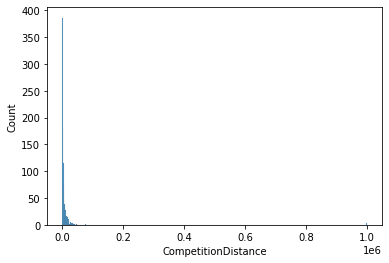

In [63]:
sns.histplot(store_df_5['CompetitionDistance'])
plt.show()

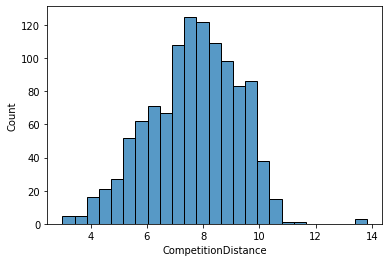

In [64]:
sns.histplot(np.log(store_df_5['CompetitionDistance']))
plt.show()

In [65]:
# competition distance
# log + scaling
log_competition_distance = np.log(store_df_5['CompetitionDistance'])
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(np.array(log_competition_distance).reshape(-1,1))

store_df_6 = store_df_5.copy()
store_df_6['CompetitionDistance'] = scaler.transform(np.array(log_competition_distance).reshape(-1,1))

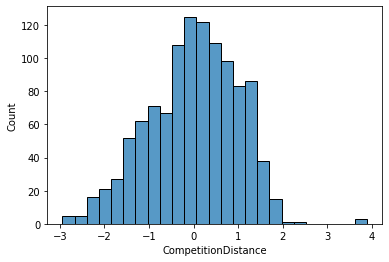

In [66]:
sns.histplot(store_df_6['CompetitionDistance'])
plt.show()

In [67]:
# competition distance
train_df8 = train_df7.merge(store_df_6[['Store', 'CompetitionDistance']], left_on='Store', right_on='Store', how='left')
train_df8['competition_distance_if_exists'] = train_df8['has_competitor'] * train_df8['CompetitionDistance']
train_df9 = train_df8.drop(columns = 'CompetitionDistance')

In [68]:
train_df9.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,...,month_12,StoreType,StoreType_a,StoreType_b,StoreType_c,Assortment,assort_a,assort_b,has_competitor,competition_distance_if_exists
0,1,5,31/07/2015,5263,555,1,1,0,1,2015,...,0,c,0,0,1,a,1,0,1,-0.324089
1,2,5,31/07/2015,6064,625,1,1,0,1,2015,...,0,a,1,0,0,a,1,0,1,-0.829636
2,3,5,31/07/2015,8314,821,1,1,0,1,2015,...,0,a,1,0,0,a,1,0,1,1.196260
3,4,5,31/07/2015,13995,1498,1,1,0,1,2015,...,0,c,0,0,1,c,0,0,1,-0.776577
4,5,5,31/07/2015,4822,559,1,1,0,1,2015,...,0,a,1,0,0,a,1,0,1,1.669471


### Promo2

In [69]:
train_df9.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'year', 'month', 'year_month',
       'year_2014', 'year_2015', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'StoreType', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'Assortment', 'assort_a', 'assort_b', 'has_competitor',
       'competition_distance_if_exists'],
      dtype='object')

In [70]:
store_df_6.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,month,year,competition_datetime
0,1,c,a,-0.324089,9.0,2008.0,0,1.0,2030.0,"Jan,Apr,Jul,Oct",9,2008,2008-09-01
1,2,a,a,-0.829636,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",11,2007,2007-11-01
2,3,a,a,1.196260,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",12,2006,2006-12-01
3,4,c,c,-0.776577,9.0,2009.0,0,1.0,2030.0,"Jan,Apr,Jul,Oct",9,2009,2009-09-01
4,5,a,a,1.669471,4.0,2015.0,0,1.0,2030.0,"Jan,Apr,Jul,Oct",4,2015,2015-04-01


In [71]:
# COnvert Promo2Since to datetime
from datetime import datetime, timedelta

week = store_df_6['Promo2SinceWeek'].astype(int)
year = store_df_6['Promo2SinceYear'].astype(int)

dates = [datetime(y, 1, 1) + timedelta(weeks=w-1) for y, w in zip(year, week)]
promo2_since_datetime_df = pd.DataFrame(dates)
promo2_since_datetime_df.to_csv('promo2_since_datetime_df.csv', index=True)

store_df_6['promo2_since_datetime'] = promo2_since_datetime_df

In [72]:
store_df_6.shape

(1115, 14)

In [73]:
# COnvert PromoInterval to list of int
month_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 
              'Jul': 7, 'Aug': 8, 'Sept': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

int_promo_interval = []
for i in range(1115):
  months = store_df_6.iloc[i]['PromoInterval'].split(',')
  int_months = [month_dict[month] for month in months]
  int_promo_interval.append(int_months)

store_df_6['int_promo_interval'] = int_promo_interval


In [74]:
train_df9 = train_df9.merge(store_df_6[['Store', 'Promo2', 'promo2_since_datetime', 'int_promo_interval']], left_on='Store', right_on='Store', how='left')
print(train_df9.shape)

(1017209, 37)


In [75]:
'''
is_in_promo2 = []
for i in range(1017209):
  if pd.to_datetime(train_df9.loc[i]['year_month'])> train_df9.loc[i]['promo2_since_datetime']:
    is_in_promo2.append(1)
  else:
    is_in_promo2.append(0)
print(len(is_in_promo2))

is_in_promo2_df = pd.DataFrame(is_in_promo2)
is_in_promo2_df.to_csv('is_in_promo2_df.csv', index=True)
'''

"\nis_in_promo2 = []\nfor i in range(1017209):\n  if pd.to_datetime(train_df9.loc[i]['year_month'])> train_df9.loc[i]['promo2_since_datetime']:\n    is_in_promo2.append(1)\n  else:\n    is_in_promo2.append(0)\nprint(len(is_in_promo2))\n"

In [76]:
'''

'''
is_in_promo2_df = pd.read_csv('is_in_promo2_df.csv')

train_df9['is_in_promo2'] = is_in_promo2_df['0']

In [77]:
train_df9.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,...,StoreType_c,Assortment,assort_a,assort_b,has_competitor,competition_distance_if_exists,Promo2,promo2_since_datetime,int_promo_interval,is_in_promo2
0,1,5,31/07/2015,5263,555,1,1,0,1,2015,...,1,a,1,0,1,-0.324089,0,2030-01-01,"[1, 4, 7, 10]",0
1,2,5,31/07/2015,6064,625,1,1,0,1,2015,...,0,a,1,0,1,-0.829636,1,2010-03-26,"[1, 4, 7, 10]",1
2,3,5,31/07/2015,8314,821,1,1,0,1,2015,...,0,a,1,0,1,1.196260,1,2011-04-02,"[1, 4, 7, 10]",1
3,4,5,31/07/2015,13995,1498,1,1,0,1,2015,...,1,c,0,0,1,-0.776577,0,2030-01-01,"[1, 4, 7, 10]",0
4,5,5,31/07/2015,4822,559,1,1,0,1,2015,...,0,a,1,0,1,1.669471,0,2030-01-01,"[1, 4, 7, 10]",0


In [78]:
from tqdm import tqdm

In [79]:
jan_list = [1, 4, 7, 10]
feb_list = [2, 5, 8, 11]
mar_list = [3, 6, 9, 12]
'''
promo2_status = []
for i in tqdm(range(1017209)):
  interval_list = train_df9.iloc[i]['int_promo_interval']
  if interval_list == jan_list:
    # interval_list_plus_1 = [(x+1)%12 for x in train_df9.iloc[i]['int_promo_interval']]
    # interval_list_plus_2 = [(x+2)%12 for x in train_df9.iloc[i]['int_promo_interval']]
    interval_list_plus_1 = feb_list
    interval_list_plus_2 = mar_list
  elif interval_list == feb_list:
    # interval_list_plus_1 = [(x+1)%12 for x in train_df9.iloc[i]['int_promo_interval']]
    # interval_list_plus_2 = [(x+2)%12 for x in train_df9.iloc[i]['int_promo_interval']]
    interval_list_plus_1 = mar_list
    interval_list_plus_2 = jan_list
  elif interval_list == mar_list:
    # interval_list_plus_1 = [(x+1)%12 for x in train_df9.iloc[i]['int_promo_interval']]
    # interval_list_plus_2 = [(x+2)%12 for x in train_df9.iloc[i]['int_promo_interval']]
    interval_list_plus_1 = jan_list
    interval_list_plus_2 = feb_list

  if train_df9.iloc[i]['is_in_promo2'] == 0:
    promo2_status.append(0)
  elif train_df9.iloc[i]['month'] in interval_list:
    promo2_status.append(1)
  elif train_df9.iloc[i]['month'] in interval_list_plus_1:
    promo2_status.append(2)
  elif train_df9.iloc[i]['month'] in interval_list_plus_2:
    promo2_status.append(3)
  '''

"\npromo2_status = []\nfor i in tqdm(range(1017209)):\n  interval_list = train_df9.iloc[i]['int_promo_interval']\n  if interval_list == jan_list:\n    # interval_list_plus_1 = [(x+1)%12 for x in train_df9.iloc[i]['int_promo_interval']]\n    # interval_list_plus_2 = [(x+2)%12 for x in train_df9.iloc[i]['int_promo_interval']]\n    interval_list_plus_1 = feb_list\n    interval_list_plus_2 = mar_list\n  elif interval_list == feb_list:\n    # interval_list_plus_1 = [(x+1)%12 for x in train_df9.iloc[i]['int_promo_interval']]\n    # interval_list_plus_2 = [(x+2)%12 for x in train_df9.iloc[i]['int_promo_interval']]\n    interval_list_plus_1 = mar_list\n    interval_list_plus_2 = jan_list\n  elif interval_list == mar_list:\n    # interval_list_plus_1 = [(x+1)%12 for x in train_df9.iloc[i]['int_promo_interval']]\n    # interval_list_plus_2 = [(x+2)%12 for x in train_df9.iloc[i]['int_promo_interval']]\n    interval_list_plus_1 = jan_list\n    interval_list_plus_2 = feb_list\n\n  if train_df9.iloc

In [80]:
'''
promo2_status_df = pd.DataFrame(promo2_status)
promo2_status_df.to_csv('promo2_status_df', index = True)
'''
promo2_status_df = pd.read_csv('promo2_status_df')

In [81]:
train_df9['promo2_status'] = promo2_status_df['0']

# Get the one-hot encoding of the 'state holiday' column
promo2_status_one_hot_encoded = pd.get_dummies(train_df9['promo2_status'])

# Concatenate the one-hot encoding with the merged dataframe
train_df9 = pd.concat([train_df9, promo2_status_one_hot_encoded], axis=1)

In [82]:
# Drop the original 'Store Category' column
train_df9.drop('promo2_status', axis=1, inplace=True)

In [83]:
train_df9.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,...,has_competitor,competition_distance_if_exists,Promo2,promo2_since_datetime,int_promo_interval,is_in_promo2,0,1,2,3
0,1,5,31/07/2015,5263,555,1,1,0,1,2015,...,1,-0.324089,0,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0
1,2,5,31/07/2015,6064,625,1,1,0,1,2015,...,1,-0.829636,1,2010-03-26,"[1, 4, 7, 10]",1,0,1,0,0
2,3,5,31/07/2015,8314,821,1,1,0,1,2015,...,1,1.196260,1,2011-04-02,"[1, 4, 7, 10]",1,0,1,0,0
3,4,5,31/07/2015,13995,1498,1,1,0,1,2015,...,1,-0.776577,0,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0
4,5,5,31/07/2015,4822,559,1,1,0,1,2015,...,1,1.669471,0,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0


In [85]:
col_list = list(train_df9.columns)
col_list[-1] = 'third_months_of_promo'
col_list[-2] = 'second_month_of_promo'
col_list[-3] = 'first_month_of_promo'
col_list[-4] = 'not_in_promo2'
print(col_list)

['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'year', 'month', 'year_month', 'year_2014', 'year_2015', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'StoreType', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'Assortment', 'assort_a', 'assort_b', 'has_competitor', 'competition_distance_if_exists', 'Promo2', 'promo2_since_datetime', 'int_promo_interval', 'is_in_promo2', 'not_in_promo2', 'first_month_of_promo', 'second_month_of_promo', 'third_months_of_promo']


In [86]:

train_df9.columns = col_list


In [87]:
train_df9.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,...,has_competitor,competition_distance_if_exists,Promo2,promo2_since_datetime,int_promo_interval,is_in_promo2,not_in_promo2,first_month_of_promo,second_month_of_promo,third_months_of_promo
0,1,5,31/07/2015,5263,555,1,1,0,1,2015,...,1,-0.324089,0,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0
1,2,5,31/07/2015,6064,625,1,1,0,1,2015,...,1,-0.829636,1,2010-03-26,"[1, 4, 7, 10]",1,0,1,0,0
2,3,5,31/07/2015,8314,821,1,1,0,1,2015,...,1,1.196260,1,2011-04-02,"[1, 4, 7, 10]",1,0,1,0,0
3,4,5,31/07/2015,13995,1498,1,1,0,1,2015,...,1,-0.776577,0,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0
4,5,5,31/07/2015,4822,559,1,1,0,1,2015,...,1,1.669471,0,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0


### Day

skip
(最悪無くても良いので、とりあえずskip)

### Store specific promo

binaryなのでそのままでok

### State holiday


In [88]:
pd.unique(train_df9.loc[:,'StateHoliday'])

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [89]:
train_df10 = train_df9.replace({'StateHoliday': {'0': 'not_holiday', 0: 'not_holiday', 'a': 'public_holiday', 'b': 'easter_holiday', 'c': 'christmas'}})

In [90]:
pd.unique(train_df10.loc[:,'StateHoliday'])

array(['not_holiday', 'public_holiday', 'easter_holiday', 'christmas'],
      dtype=object)

In [91]:
# Get the one-hot encoding of the 'state holiday' column
state_holiday_one_hot_encoded = pd.get_dummies(train_df10['StateHoliday'], prefix='is')

# Concatenate the one-hot encoding with the merged dataframe
train_df11 = pd.concat([train_df10, state_holiday_one_hot_encoded], axis=1)

# Drop the original 'Store Category' column
train_df11.drop('StateHoliday', axis=1, inplace=True)

In [92]:
train_df11.drop('is_not_holiday', axis=1, inplace=True)

In [93]:
train_df11.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,year,month,...,promo2_since_datetime,int_promo_interval,is_in_promo2,not_in_promo2,first_month_of_promo,second_month_of_promo,third_months_of_promo,is_christmas,is_easter_holiday,is_public_holiday
0,1,5,31/07/2015,5263,555,1,1,1,2015,7,...,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0,0,0,0
1,2,5,31/07/2015,6064,625,1,1,1,2015,7,...,2010-03-26,"[1, 4, 7, 10]",1,0,1,0,0,0,0,0
2,3,5,31/07/2015,8314,821,1,1,1,2015,7,...,2011-04-02,"[1, 4, 7, 10]",1,0,1,0,0,0,0,0
3,4,5,31/07/2015,13995,1498,1,1,1,2015,7,...,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0,0,0,0
4,5,5,31/07/2015,4822,559,1,1,1,2015,7,...,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0,0,0,0


### Lag sales

not possible to include lag variable in linear model (no data in test data)

# Other preprocessing

### Reverse

In [94]:
# Reverse the df because it is chronological
train_df12 = train_df11.iloc[::-1]

In [95]:
train_df12.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,year,month,...,promo2_since_datetime,int_promo_interval,is_in_promo2,not_in_promo2,first_month_of_promo,second_month_of_promo,third_months_of_promo,is_christmas,is_easter_holiday,is_public_holiday
1017208,1115,2,01/01/2013,0,0,0,0,1,2013,1,...,2012-05-27,"[3, 6, 9, 12]",1,0,0,1,0,0,0,1
1017207,1114,2,01/01/2013,0,0,0,0,1,2013,1,...,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0,0,0,1
1017206,1113,2,01/01/2013,0,0,0,0,1,2013,1,...,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0,0,0,1
1017205,1112,2,01/01/2013,0,0,0,0,1,2013,1,...,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0,0,0,1
1017204,1111,2,01/01/2013,0,0,0,0,1,2013,1,...,2013-07-30,"[1, 4, 7, 10]",0,1,0,0,0,0,0,1


### Drop closed days

In [96]:
# Uninterpretable observations
train_df12[(train_df12['Open'] != 0) & (train_df12['Sales'] == 0) & (train_df12['Customers'] !=0)].shape

(2, 44)

In [97]:
# Remove closed days
train_df13 = train_df12[train_df12['Open'] != 0]

In [98]:
print(train_df12.shape)
print(train_df13.shape)

(1017209, 44)
(844392, 44)


Drop columns
- drop date
- Open
- drop year 
- drop month
- drop month_12
- drop Storetype_d

In [99]:
linear_train = train_df13.drop(columns = ['Store', 'DayOfWeek', 'Date', 'Open', 'Customers', 'year', 'month', 'StoreType', 'Assortment', 'year_month'])

In [100]:
linear_train = linear_train.drop(columns = ['Promo2', 'promo2_since_datetime', 'is_in_promo2', 'int_promo_interval', 'third_months_of_promo'])

In [101]:
linear_train.head()

,Sales,Promo,SchoolHoliday,year_2014,year_2015,month_2,month_3,month_4,month_5,month_6,...,assort_a,assort_b,has_competitor,competition_distance_if_exists,not_in_promo2,first_month_of_promo,second_month_of_promo,is_christmas,is_easter_holiday,is_public_holiday
1017190,5961,0,1,0,0,0,0,0,0,0,...,0,1,1,-0.682217,1,0,0,0,0,1
1017042,4491,0,1,0,0,0,0,0,0,0,...,0,1,1,-0.249212,1,0,0,0,0,1
1016863,5035,0,1,0,0,0,0,0,0,0,...,0,1,1,-0.584942,0,1,0,0,0,1
1016827,10765,0,1,0,0,0,0,0,0,0,...,0,1,1,-0.570093,1,0,0,0,0,1
1016776,3375,0,1,0,0,0,0,0,0,0,...,1,0,1,-1.672073,1,0,0,0,0,1


In [102]:
linear_train.columns

Index(['Sales', 'Promo', 'SchoolHoliday', 'year_2014', 'year_2015', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'assort_a', 'assort_b', 'has_competitor',
       'competition_distance_if_exists', 'not_in_promo2',
       'first_month_of_promo', 'second_month_of_promo', 'is_christmas',
       'is_easter_holiday', 'is_public_holiday'],
      dtype='object')

### Take log of sales

In [103]:
'''
sns.histplot(linear_train[['Sales']])
plt.show()
'''

"\nsns.histplot(linear_train[['Sales']])\nplt.show()\n"

In [104]:
# Check if there is a day sales==0 even though Open == 1
linear_train[linear_train['Sales'] == 0].shape

(54, 29)

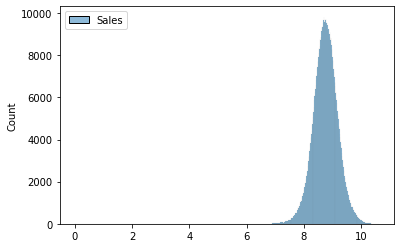

In [105]:

log_sales = np.log1p(linear_train[['Sales']])
sns.histplot(log_sales)
plt.show()


### Train-test splitting

In [106]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Split the data into a training set and a test set
X_train, X_val, y_train, y_val = train_test_split(linear_train.drop("Sales", axis=1), log_sales[['Sales']], test_size=0.2, shuffle=False)

'''
# Standardise Sales
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(np.array(y_train['Sales']).reshape(-1,1))
y_train['Sales'] = scaler.transform(np.array(y_train['Sales']).reshape(-1,1))
y_val['Sales'] = scaler.transform(np.array(y_val['Sales']).reshape(-1,1))
'''

'''
# Drop 'Open'
X_train_without_open = X_train.drop(columns='Open')
X_val_without_open = X_val.drop(columns='Open')
'''



"\n# Drop 'Open'\nX_train_without_open = X_train.drop(columns='Open')\nX_val_without_open = X_val.drop(columns='Open')\n"

# Modelling

## Normal Regression

In [107]:
X_train.columns

Index(['Promo', 'SchoolHoliday', 'year_2014', 'year_2015', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'assort_a', 'assort_b', 'has_competitor',
       'competition_distance_if_exists', 'not_in_promo2',
       'first_month_of_promo', 'second_month_of_promo', 'is_christmas',
       'is_easter_holiday', 'is_public_holiday'],
      dtype='object')

In [108]:
X_train.dtypes

Promo                               int64
SchoolHoliday                       int64
year_2014                           uint8
year_2015                           uint8
month_2                             uint8
month_3                             uint8
month_4                             uint8
month_5                             uint8
month_6                             uint8
month_7                             uint8
month_8                             uint8
month_9                             uint8
month_10                            uint8
month_11                            uint8
month_12                            uint8
StoreType_a                         uint8
StoreType_b                         uint8
StoreType_c                         uint8
assort_a                            uint8
assort_b                            uint8
has_competitor                      int64
competition_distance_if_exists    float64
not_in_promo2                       uint8
first_month_of_promo              

In [109]:
# Fit a linear regression model to the training data
reg = LinearRegression().fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = reg.predict(X_val)

# Calculate the Root mean squared percentage error of the predictions
def calc_rmse(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square((y_true - y_pred)), axis=0))

    return loss

In [110]:
# print(y_pred.shape)
# print(np.array(y_val['Sales']).reshape(-1,1).shape)
rmse = calc_rmse(np.array(y_val['Sales']).reshape(-1,1), y_pred)
print(rmse)

[0.36273943]


In [111]:
coef = reg.coef_
importance = pd.DataFrame({'feature': X_train.columns, 'importance': np.abs(coef[0])})
importance = importance.sort_values(by="importance", ascending = False)
print(importance)

                           feature  importance
16                     StoreType_b    0.522578
19                        assort_b    0.404809
0                            Promo    0.349475
14                        month_12    0.274661
25                    is_christmas    0.170575
26               is_easter_holiday    0.151099
18                        assort_a    0.115961
27               is_public_holiday    0.110020
13                        month_11    0.105523
22                   not_in_promo2    0.088273
7                          month_5    0.079729
8                          month_6    0.063795
20                  has_competitor    0.056158
3                        year_2015    0.052265
6                          month_4    0.045514
1                    SchoolHoliday    0.045334
5                          month_3    0.041618
2                        year_2014    0.038198
21  competition_distance_if_exists    0.035878
9                          month_7    0.033325
24           

## LASSO

In [112]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Val RMSE: {:.2f}".format(rmse))

Val RMSE: 0.37


interpreting features importance

In [113]:
coef = lasso.coef_
importance = pd.DataFrame({'feature': X_train.columns, 'importance': np.abs(coef)})
importance = importance.sort_values(by="importance", ascending = False)
print(importance)

                           feature  importance
0                            Promo    0.308353
14                        month_12    0.089349
18                        assort_a    0.068601
22                   not_in_promo2    0.059221
21  competition_distance_if_exists    0.022048
2                        year_2014    0.000000
3                        year_2015    0.000000
26               is_easter_holiday    0.000000
25                    is_christmas    0.000000
24           second_month_of_promo    0.000000
23            first_month_of_promo    0.000000
20                  has_competitor    0.000000
19                        assort_b    0.000000
17                     StoreType_c    0.000000
16                     StoreType_b    0.000000
15                     StoreType_a    0.000000
1                    SchoolHoliday    0.000000
13                        month_11    0.000000
12                        month_10    0.000000
11                         month_9    0.000000
10           

## Ridge

In [114]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_val)

# rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse = calc_rmse(np.array(y_val['Sales']).reshape(-1,1), y_pred)
print(rmse)

ridge_coef = ridge.coef_
ridge_importance = pd.DataFrame({"feature": X_train.columns, "importance": np.abs(ridge_coef)[0]})
importance = importance.sort_values(by="importance", ascending=False)
print(importance)


[0.36273952]
                           feature  importance
0                            Promo    0.308353
14                        month_12    0.089349
18                        assort_a    0.068601
22                   not_in_promo2    0.059221
21  competition_distance_if_exists    0.022048
1                    SchoolHoliday    0.000000
4                          month_2    0.000000
5                          month_3    0.000000
6                          month_4    0.000000
7                          month_5    0.000000
8                          month_6    0.000000
9                          month_7    0.000000
10                         month_8    0.000000
11                         month_9    0.000000
12                        month_10    0.000000
13                        month_11    0.000000
16                     StoreType_b    0.000000
15                     StoreType_a    0.000000
17                     StoreType_c    0.000000
19                        assort_b    0.000000


### Detect lambda

In [115]:
'''
# import numpy as np
# import pandas as pd
# from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_squared_error


# Define the range of alpha values to try
alphas = np.logspace(-10, 1, 100)

# Store the mean squared error for each value of alpha
rmse_scores = []

for alpha in alphas:
    # Define the Ridge Regression model
    lasso = Lasso(alpha=alpha)
    
    # Fit the model to the training data
    lasso.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = lasso.predict(X_val)
    rmse = calc_rmse(np.array(y_val['Sales']).reshape(-1,1), y_pred)
    rmse_scores.append(rmse)

# Find the index of the alpha value that resulted in the lowest mean squared error
best_index = np.argmin(rmse_scores)

# Choose the alpha value that resulted in the best performance
best_alpha = alphas[best_index]

# Train the final model using the best value of alpha
final_model = Lasso(alpha=best_alpha)
final_model.fit(X_train, y_train)
'''

"\n# import numpy as np\n# import pandas as pd\n# from sklearn.linear_model import Ridge\n# from sklearn.metrics import mean_squared_error\n\n\n# Define the range of alpha values to try\nalphas = np.logspace(-10, 1, 100)\n\n# Store the mean squared error for each value of alpha\nrmse_scores = []\n\nfor alpha in alphas:\n    # Define the Ridge Regression model\n    lasso = Lasso(alpha=alpha)\n    \n    # Fit the model to the training data\n    lasso.fit(X_train, y_train)\n    \n    # Evaluate the model on the test set\n    y_pred = lasso.predict(X_val)\n    rmse = calc_rmse(np.array(y_val['Sales']).reshape(-1,1), y_pred)\n    rmse_scores.append(rmse)\n\n# Find the index of the alpha value that resulted in the lowest mean squared error\nbest_index = np.argmin(rmse_scores)\n\n# Choose the alpha value that resulted in the best performance\nbest_alpha = alphas[best_index]\n\n# Train the final model using the best value of alpha\nfinal_model = Lasso(alpha=best_alpha)\nfinal_model.fit(X_train

In [116]:
'''
print(best_alpha)
plt.plot(rmse_scores)
plt.show()
'''

'\nprint(best_alpha)\nplt.plot(rmse_scores)\nplt.show()\n'

### Detect lambda

In [117]:
'''
# import numpy as np
# import pandas as pd
from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_squared_error


# Define the range of alpha values to try
alphas = np.logspace(-10, 1, 100)

# Store the mean squared error for each value of alpha
rmse_scores = []

for alpha in alphas:
    # Define the Ridge Regression model
    ridge = Ridge(alpha=alpha)
    
    # Fit the model to the training data
    ridge.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = ridge.predict(X_val)
    rmse = calc_rmse(np.array(y_val['Sales']).reshape(-1,1), y_pred)
    rmse_scores.append(rmse)

# Find the index of the alpha value that resulted in the lowest mean squared error
best_index = np.argmin(rmse_scores)

# Choose the alpha value that resulted in the best performance
best_alpha = alphas[best_index]

# Train the final model using the best value of alpha
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train, y_train)
'''

"\n# import numpy as np\n# import pandas as pd\nfrom sklearn.linear_model import Ridge\n# from sklearn.metrics import mean_squared_error\n\n\n# Define the range of alpha values to try\nalphas = np.logspace(-10, 1, 100)\n\n# Store the mean squared error for each value of alpha\nrmse_scores = []\n\nfor alpha in alphas:\n    # Define the Ridge Regression model\n    ridge = Ridge(alpha=alpha)\n    \n    # Fit the model to the training data\n    ridge.fit(X_train, y_train)\n    \n    # Evaluate the model on the test set\n    y_pred = ridge.predict(X_val)\n    rmse = calc_rmse(np.array(y_val['Sales']).reshape(-1,1), y_pred)\n    rmse_scores.append(rmse)\n\n# Find the index of the alpha value that resulted in the lowest mean squared error\nbest_index = np.argmin(rmse_scores)\n\n# Choose the alpha value that resulted in the best performance\nbest_alpha = alphas[best_index]\n\n# Train the final model using the best value of alpha\nfinal_model = Ridge(alpha=best_alpha)\nfinal_model.fit(X_train, 

In [ ]:
'''
print(best_alpha)
plt.plot(rmse_scores)
plt.show()
'''

# Predict using Test data

In [ ]:
test_df.head()

## Year month

In [ ]:
'''
# expensive
year_list = []
month_list =[]
year_month_list =[]
for i in range(41088):
    str = test_df.loc[i]['Date']
    dte = datetime.datetime.strptime(str, '%d/%m/%Y')
    year_month_list.append(dte)
    year_list.append(dte.year)
    month_list.append(dte.month)
  '''

In [118]:
'''
year_month_data = {'year': year_list, 'month': month_list, 'year_month': year_month_list}
test_year_month_df = pd.DataFrame(year_month_data)
test_year_month_df.to_csv('test_year_month_df.csv', index=True)
'''
test_year_list = pd.read_csv('test_year_month_df.csv')
test_df2 = test_df.copy()
test_df2['year'] = pd.Series(test_year_list['year'])
test_df2['month'] = pd.Series(test_year_list['month'])
test_df2['year_month'] = pd.Series(test_year_list['year_month'])
print(test_df2.head())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          4  17/09/2015    NaN        NaN   1.0      1            0   
1      3          4  17/09/2015    NaN        NaN   1.0      1            0   
2      7          4  17/09/2015    NaN        NaN   1.0      1            0   
3      8          4  17/09/2015    NaN        NaN   1.0      1            0   
4      9          4  17/09/2015    NaN        NaN   1.0      1            0   

   SchoolHoliday  year  month  year_month  
0              0  2015      9  2015-09-17  
1              0  2015      9  2015-09-17  
2              0  2015      9  2015-09-17  
3              0  2015      9  2015-09-17  
4              0  2015      9  2015-09-17  


In [119]:
# year omnth dummies
# Get the one-hot encoding of the 'Store Category' column
year_one_hot_encoded = pd.get_dummies(test_df2['year'], prefix='year')

# Concatenate the one-hot encoding with the merged dataframe
test_df2 = pd.concat([test_df2, year_one_hot_encoded], axis=1)

# Get the one-hot encoding of the 'Store Category' column
month_one_hot_encoded = pd.get_dummies(test_df2['month'], prefix='month')

# Concatenate the one-hot encoding with the merged dataframe
test_df2 = pd.concat([test_df2, month_one_hot_encoded], axis=1)

In [120]:
# Add required dummies
test_df2 = test_df2.assign(year_2014=0)
test_df2 = test_df2.assign(month_1=0)
test_df2 = test_df2.assign(month_2=0)
test_df2 = test_df2.assign(month_3=0)
test_df2 = test_df2.assign(month_4=0)
test_df2 = test_df2.assign(month_5=0)
test_df2 = test_df2.assign(month_6=0)
test_df2 = test_df2.assign(month_7=0)
test_df2 = test_df2.assign(month_10=0)
test_df2 = test_df2.assign(month_11=0)
test_df2 = test_df2.assign(month_12=0)


In [121]:
test_df2.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'year', 'month', 'year_month',
       'year_2015', 'month_8', 'month_9', 'year_2014', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_10',
       'month_11', 'month_12'],
      dtype='object')

In [122]:
test_df.shape

(41088, 9)

## Store type

In [123]:
test_df3 = test_df2.merge(store_df_4[['Store', 'StoreType']], left_on='Store', right_on='Store', how='left')

# Get the one-hot encoding of the 'Store Category' column
storetype_one_hot_encoded = pd.get_dummies(test_df3['StoreType'], prefix='StoreType')

# Concatenate the one-hot encoding with the merged dataframe
test_df4 = pd.concat([test_df3, storetype_one_hot_encoded], axis=1)

# Drop the original 'Store Category' column
# train_df4.drop('StoreType', axis=1, inplace=True)

# Drop the last category
test_df4 = test_df4.drop(columns="StoreType_d")


In [124]:
test_df4.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,...,month_5,month_6,month_7,month_10,month_11,month_12,StoreType,StoreType_a,StoreType_b,StoreType_c
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0,2015,...,0,0,0,0,0,0,c,0,0,1
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0,2015,...,0,0,0,0,0,0,a,1,0,0
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0,2015,...,0,0,0,0,0,0,a,1,0,0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0,2015,...,0,0,0,0,0,0,a,1,0,0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0,2015,...,0,0,0,0,0,0,a,1,0,0


## Assortment

In [125]:
test_df5 = test_df4.merge(store_df_4[['Store', 'Assortment']], left_on='Store', right_on='Store', how='left')

# Get the one-hot encoding of the 'Store Category' column
assort_one_hot_encoded = pd.get_dummies(test_df5['Assortment'], prefix='assort')

# Concatenate the one-hot encoding with the merged dataframe
test_df5 = pd.concat([test_df5, assort_one_hot_encoded], axis=1)

# Drop the original 'Store Category' column
# train_df4.drop('StoreType', axis=1, inplace=True)

# Drop the last category
test_df5 = test_df5.drop(columns="assort_c")

In [126]:
test_df5.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,...,month_10,month_11,month_12,StoreType,StoreType_a,StoreType_b,StoreType_c,Assortment,assort_a,assort_b
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0,2015,...,0,0,0,c,0,0,1,a,1,0
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0,2015,...,0,0,0,a,1,0,0,a,1,0
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0,2015,...,0,0,0,a,1,0,0,c,0,0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0,2015,...,0,0,0,a,1,0,0,a,1,0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0,2015,...,0,0,0,a,1,0,0,c,0,0


## Competition

In [127]:
test_df5.shape

(41088, 33)

In [129]:
test_df6 = test_df5.merge(store_df_5[['Store', 'competition_datetime']], left_on='Store', right_on='Store', how='left')

'''
has_competition = []
for i in range(41088):
  if test_df6.loc[i]['year_month']> test_df6.loc[i]['competition_datetime']:
    has_competition.append(1)
  else:
    has_competition.append(0)
print(len(has_competition))
'''

"\nhas_competition = []\nfor i in range(41088):\n  if test_df6.loc[i]['year_month']> test_df6.loc[i]['competition_datetime']:\n    has_competition.append(1)\n  else:\n    has_competition.append(0)\nprint(len(has_competition))\n"

In [ ]:
'''
test_has_competition_df = pd.DataFrame(has_competition)
test_has_competition_df.to_csv('test_has_competition_df.csv', index=True)
'''

In [130]:
test_has_competition_df = pd.read_csv('test_has_competition_df.csv')

test_has_competition_df.shape

(41088, 2)

In [131]:
test_df6.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,...,month_11,month_12,StoreType,StoreType_a,StoreType_b,StoreType_c,Assortment,assort_a,assort_b,competition_datetime
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0,2015,...,0,0,c,0,0,1,a,1,0,2008-09-01
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0,2015,...,0,0,a,1,0,0,a,1,0,2006-12-01
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0,2015,...,0,0,a,1,0,0,c,0,0,2013-04-01
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0,2015,...,0,0,a,1,0,0,a,1,0,2014-10-01
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0,2015,...,0,0,a,1,0,0,c,0,0,2000-08-01


In [134]:
test_df6['has_competitor'] = test_has_competition_df[['0']]

In [135]:
test_df7 = test_df6.drop(columns = 'competition_datetime')

# competition distance
test_df8 = test_df7.merge(store_df_6[['Store', 'CompetitionDistance']], left_on='Store', right_on='Store', how='left')
test_df8['competition_distance_if_exists'] = test_df8['has_competitor'] * test_df8['CompetitionDistance']
test_df9 = test_df8.drop(columns = 'CompetitionDistance')

## Promo2

In [149]:
test_df9 = test_df9.merge(store_df_6[['Store', 'Promo2', 'promo2_since_datetime', 'int_promo_interval']], left_on='Store', right_on='Store', how='left')


In [152]:
'''
from tqdm import tqdm
test_is_in_promo2 = []
for i in tqdm(range(41088)):
  if pd.to_datetime(test_df9.loc[i]['year_month'])> test_df9.loc[i]['promo2_since_datetime']:
    test_is_in_promo2.append(1)
  else:
    test_is_in_promo2.append(0)
print(len(test_is_in_promo2))

test_is_in_promo2_df = pd.DataFrame(test_is_in_promo2)
test_is_in_promo2_df.to_csv('test_is_in_promo2_df.csv', index=True)
'''

100%|██████████| 41088/41088 [00:38<00:00, 1053.81it/s]


41088


In [155]:
test_is_in_promo2_df = pd.read_csv('test_is_in_promo2_df.csv')

test_df9['is_in_promo2'] = test_is_in_promo2_df['0']

In [159]:
test_df9.shape

(41088, 39)

In [160]:
test_df9.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'year', 'month', 'year_month',
       'year_2015', 'month_8', 'month_9', 'year_2014', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_10',
       'month_11', 'month_12', 'StoreType', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'Assortment', 'assort_a', 'assort_b', 'has_competitor',
       'competition_distance_if_exists', 'Promo2', 'promo2_since_datetime',
       'int_promo_interval', 'is_in_promo2'],
      dtype='object')

In [161]:
jan_list = [1, 4, 7, 10]
feb_list = [2, 5, 8, 11]
mar_list = [3, 6, 9, 12]

promo2_status = []
for i in tqdm(range(41088)):
  interval_list = test_df9.iloc[i]['int_promo_interval']
  if interval_list == jan_list:
    # interval_list_plus_1 = [(x+1)%12 for x in train_df9.iloc[i]['int_promo_interval']]
    # interval_list_plus_2 = [(x+2)%12 for x in train_df9.iloc[i]['int_promo_interval']]
    interval_list_plus_1 = feb_list
    interval_list_plus_2 = mar_list
  elif interval_list == feb_list:
    # interval_list_plus_1 = [(x+1)%12 for x in train_df9.iloc[i]['int_promo_interval']]
    # interval_list_plus_2 = [(x+2)%12 for x in train_df9.iloc[i]['int_promo_interval']]
    interval_list_plus_1 = mar_list
    interval_list_plus_2 = jan_list
  elif interval_list == mar_list:
    # interval_list_plus_1 = [(x+1)%12 for x in train_df9.iloc[i]['int_promo_interval']]
    # interval_list_plus_2 = [(x+2)%12 for x in train_df9.iloc[i]['int_promo_interval']]
    interval_list_plus_1 = jan_list
    interval_list_plus_2 = feb_list

  if test_df9.iloc[i]['is_in_promo2'] == 0:
    promo2_status.append(0)
  elif test_df9.iloc[i]['month'] in interval_list:
    promo2_status.append(1)
  elif test_df9.iloc[i]['month'] in interval_list_plus_1:
    promo2_status.append(2)
  elif test_df9.iloc[i]['month'] in interval_list_plus_2:
    promo2_status.append(3)


100%|██████████| 41088/41088 [00:43<00:00, 953.74it/s]


In [162]:
test_promo2_status_df = pd.DataFrame(promo2_status)
test_promo2_status_df.to_csv('test_promo2_status_df', index = True)

test_promo2_status_df = pd.read_csv('test_promo2_status_df')

In [163]:
test_df9['promo2_status'] = test_promo2_status_df['0']

# Get the one-hot encoding of the 'state holiday' column
promo2_status_one_hot_encoded = pd.get_dummies(test_df9['promo2_status'])

# Concatenate the one-hot encoding with the merged dataframe
test_df9 = pd.concat([test_df9, promo2_status_one_hot_encoded], axis=1)

In [164]:
# Drop the original 'Store Category' column
test_df9.drop('promo2_status', axis=1, inplace=True)

In [165]:
test_df9.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,...,has_competitor,competition_distance_if_exists,Promo2,promo2_since_datetime,int_promo_interval,is_in_promo2,0,1,2,3
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0,2015,...,1,-0.324089,0,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0,2015,...,1,1.196260,1,2011-04-02,"[1, 4, 7, 10]",1,0,0,0,1
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0,2015,...,1,1.530555,0,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0,2015,...,1,0.798243,0,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0,2015,...,1,-0.028120,0,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0


In [166]:
col_list = list(test_df9.columns)
col_list[-1] = 'third_months_of_promo'
col_list[-2] = 'second_month_of_promo'
col_list[-3] = 'first_month_of_promo'
col_list[-4] = 'not_in_promo2'
print(col_list)

['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'year', 'month', 'year_month', 'year_2015', 'month_8', 'month_9', 'year_2014', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_10', 'month_11', 'month_12', 'StoreType', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'Assortment', 'assort_a', 'assort_b', 'has_competitor', 'competition_distance_if_exists', 'Promo2', 'promo2_since_datetime', 'int_promo_interval', 'is_in_promo2', 'not_in_promo2', 'first_month_of_promo', 'second_month_of_promo', 'third_months_of_promo']


In [167]:
test_df9.columns = col_list

## State Holiday

In [168]:
test_df10 = test_df9.replace({'StateHoliday': {'0': 'not_holiday', 0: 'not_holiday', 'a': 'public_holiday', 'b': 'easter_holiday', 'c': 'christmas'}})

# Get the one-hot encoding of the 'state holiday' column
state_holiday_one_hot_encoded = pd.get_dummies(test_df10['StateHoliday'], prefix='is')

# Concatenate the one-hot encoding with the merged dataframe
test_df11 = pd.concat([test_df10, state_holiday_one_hot_encoded], axis=1)

# Drop the original 'Store Category' column
test_df11.drop('StateHoliday', axis=1, inplace=True)

In [169]:
test_df11.shape

(41088, 44)

In [170]:
test_df11 = test_df11.assign(is_easter_holiday=0)
test_df11 = test_df11.assign(is_christmas=0)
test_df11.drop('is_not_holiday', axis=1, inplace=True)

In [171]:
test_df11.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,year,month,...,promo2_since_datetime,int_promo_interval,is_in_promo2,not_in_promo2,first_month_of_promo,second_month_of_promo,third_months_of_promo,is_public_holiday,is_easter_holiday,is_christmas
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,2015,9,...,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0,0,0,0
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,2015,9,...,2011-04-02,"[1, 4, 7, 10]",1,0,0,0,1,0,0,0
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,2015,9,...,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0,0,0,0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,2015,9,...,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0,0,0,0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,2015,9,...,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0,0,0,0


## Other preprocessing

In [172]:
# Reverse the df because it is chronological
test_df12 = test_df11.iloc[::-1]

In [173]:
# Remove closed days
test_df13 = test_df12[test_df12['Open'] != 0]

In [174]:
print(test_df13.shape)
test_df13.head()

(35104, 45)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,year,month,...,promo2_since_datetime,int_promo_interval,is_in_promo2,not_in_promo2,first_month_of_promo,second_month_of_promo,third_months_of_promo,is_public_holiday,is_easter_holiday,is_christmas
41087,1115,6,01/08/2015,NaN,NaN,1.0,0,1,2015,8,...,2012-05-27,"[3, 6, 9, 12]",1,0,0,0,1,0,0,0
41086,1114,6,01/08/2015,NaN,NaN,1.0,0,0,2015,8,...,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0,0,0,0
41085,1113,6,01/08/2015,NaN,NaN,1.0,0,0,2015,8,...,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0,0,0,0
41084,1112,6,01/08/2015,NaN,NaN,1.0,0,0,2015,8,...,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0,0,0,0
41083,1111,6,01/08/2015,NaN,NaN,1.0,0,0,2015,8,...,2013-07-30,"[1, 4, 7, 10]",1,0,0,1,0,0,0,0


In [175]:
linear_test = test_df13.drop(columns = ['Store', 'DayOfWeek', 'Date', 'Open', 'Customers', 'year', 'month', 'StoreType', 'Assortment', 'year_month'])

In [176]:
linear_test.head()

,Sales,Promo,SchoolHoliday,year_2015,month_8,month_9,year_2014,month_1,month_2,month_3,...,promo2_since_datetime,int_promo_interval,is_in_promo2,not_in_promo2,first_month_of_promo,second_month_of_promo,third_months_of_promo,is_public_holiday,is_easter_holiday,is_christmas
41087,NaN,0,1,1,1,0,0,0,0,0,...,2012-05-27,"[3, 6, 9, 12]",1,0,0,0,1,0,0,0
41086,NaN,0,0,1,1,0,0,0,0,0,...,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0,0,0,0
41085,NaN,0,0,1,1,0,0,0,0,0,...,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0,0,0,0
41084,NaN,0,0,1,1,0,0,0,0,0,...,2030-01-01,"[1, 4, 7, 10]",0,1,0,0,0,0,0,0
41083,NaN,0,0,1,1,0,0,0,0,0,...,2013-07-30,"[1, 4, 7, 10]",1,0,0,1,0,0,0,0


In [177]:
linear_test.columns

Index(['Sales', 'Promo', 'SchoolHoliday', 'year_2015', 'month_8', 'month_9',
       'year_2014', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_10', 'month_11', 'month_12', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'assort_a', 'assort_b', 'has_competitor',
       'competition_distance_if_exists', 'Promo2', 'promo2_since_datetime',
       'int_promo_interval', 'is_in_promo2', 'not_in_promo2',
       'first_month_of_promo', 'second_month_of_promo',
       'third_months_of_promo', 'is_public_holiday', 'is_easter_holiday',
       'is_christmas'],
      dtype='object')

In [178]:
features_order_list = list(X_train.columns)

In [179]:
ordered_linear_test = linear_test[features_order_list]

In [180]:
print(linear_test.shape)
print(ordered_linear_test.shape)
ordered_linear_test.head()

(35104, 35)
(35104, 28)


,Promo,SchoolHoliday,year_2014,year_2015,month_2,month_3,month_4,month_5,month_6,month_7,...,assort_a,assort_b,has_competitor,competition_distance_if_exists,not_in_promo2,first_month_of_promo,second_month_of_promo,is_christmas,is_easter_holiday,is_public_holiday
41087,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0.583394,0,0,0,0,0,0
41086,0,0,0,1,0,0,0,0,0,0,...,0,0,1,-0.562798,1,0,0,0,0,0
41085,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0.929586,1,0,0,0,0,0
41084,0,0,0,1,0,0,0,0,0,0,...,0,0,1,-0.076561,1,0,0,0,0,0
41083,0,0,0,1,0,0,0,0,0,0,...,1,0,1,-0.069884,0,0,1,0,0,0


## Predicting

In [181]:

# Use the trained model to make predictions on the test data
y_pred = reg.predict(ordered_linear_test)

print(y_pred.shape)

(35104, 1)


In [182]:
y_pred

array([[8.60998049],
       [8.67705636],
       [8.62351332],
       ...,
       [8.95792614],
       [8.76568642],
       [8.92114563]])

In [183]:
test_df2.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'year', 'month', 'year_month',
       'year_2015', 'month_8', 'month_9', 'year_2014', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_10',
       'month_11', 'month_12'],
      dtype='object')

In [184]:
forecasted_index = test_df2[test_df2['Open'] != 0]['year_month'].iloc[::-1]
test_store_id = test_df2[test_df2['Open'] != 0]['Store']
forecasting_df = pd.DataFrame(np.expm1(y_pred), index = forecasted_index, columns = ['forecasted_sales'])
forecasting_df['store_id'] = np.array(test_store_id).reshape(-1,1)

In [185]:
forecasting_df.head()

,forecasted_sales,store_id
year_month,,
2015-08-01,5485.141626,1
2015-08-01,5865.751526,3
2015-08-01,5559.889274,7
2015-08-01,5837.630578,8
2015-08-01,4578.751218,9


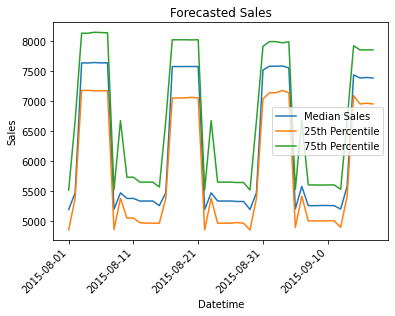

In [186]:
# Create a pivot table with Datetime as index, Store ID as columns and Sales as values
pivot_df = pd.pivot_table(forecasting_df, index='year_month', columns='store_id', values='forecasted_sales')

# Compute the rolling mean for each store
# rolling_mean = pivot_df.rolling(window=3).mean()

rolling_mean = pivot_df.copy()

rolling_mean_median = rolling_mean.quantile(q=0.5, axis=1)
rolling_mean_25 = rolling_mean.quantile(q=0.25, axis=1)
rolling_mean_75 = rolling_mean.quantile(q=0.75, axis=1)

# Plot the rolling mean sales for each store
rolling_mean_median.plot()
rolling_mean_25.plot()
rolling_mean_75.plot()
plt.xlabel('Datetime')
plt.ylabel('Sales')
plt.legend(['Median Sales', '25th Percentile', '75th Percentile'])
plt.xticks(rotation=45, ha='right')
plt.title('Forecasted Sales')

plt.show()